#LAB 8 : Classification

  1. Support Vector Machines 
  2. K-Nearest Neighbors
  3. Classification on MNIST Digit 

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math

#Support Vector Machines (SVM)



1. Try to maximize the margin of separation between data.
2. Instead of learning wx+b=0  separating hyperplane directly (like logistic regression), SVM try to learn wx+b=0, such that, the margin between two hyperplanes wx+b=1 and wx+b=-1 (also known as support vectors) is maximum. 
3. Margin between wx+b=1 and wx+b=-1 hyperplane is $\frac{2}{||w||}$
4. we have a constraint optimization problem of maximizing $\frac{2}{||w||}$, with constraints wx+b>=1 (for +ve class) and wx+b<=-1 (for -ve class).
5. As $y_{i}=1$ for +ve class and $y_{i}=-1$ for -ve class, the constraint can be re-written as:
$$y(wx+b)>=1$$

6. Final optimization is (i.e to find w and b):
$$\min_{||w||}\frac{1}{2}||w||,$$
$$y(wx+b) \geq 1,~\forall ~data $$



Acknowledgement:

https://pythonprogramming.net/predictions-svm-machine-learning-tutorial/

https://medium.com/deep-math-machine-learning-ai/chapter-3-1-svm-from-scratch-in-python-86f93f853dc

## Data generation:
1. Generate 2D gaussian data with fixed mean and variance for 2 class.(var=Identity, class1: mean[-4,-4], class2: mean[1,1], No. of data 25 from each class)
2. create the label matrix
3. Plot the generated data

(50, 2)
(50,)


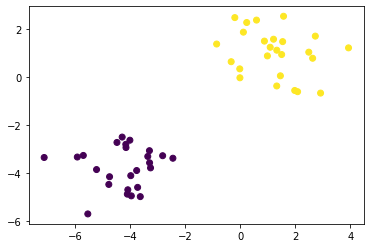

In [19]:
No_sample=50
mean1=np.array([-4,-4])
var1=np.array([[1,0],[0,1]])
mean2=np.array([1,1])
var2=var1
data1=np.random.multivariate_normal(mean1,var1,int(No_sample/2))
data2=np.random.multivariate_normal(mean2,var2,int(No_sample/2))
X=np.concatenate((data1,data2))
print(X.shape)
y=np.concatenate((-1*np.ones(data1.shape[0]),np.ones(data2.shape[0])))
print(y.shape)

plt.figure()
plt.scatter(X[:,0],X[:,1],marker='o',c=y)

Create a data dictionary, which contains both label and data points.

In [20]:
postiveX=data1
negativeX=data2

## Write your code here

#our data dictionary
data_dict = {-1:np.array(negativeX), 1:np.array(postiveX)} 
# print(data_dict)

## SVM training
1. create a search space for w (i.e w1=w2),[0, 0.5*max((abs(feat)))] and  for b, [-max((abs(feat))),max((abs(feat)))], with appropriate step.
2. we will start with a higher step and find optimal w and b, then we will reduce the step and again re-evaluate the optimal one.

3. In each step, we will take transform of w, [1,1], [-1,1],[1,-1] and [-1,-1] to search arround the w. 

4. In every pass (for a fixed step size) we will store all the w, b and its corresponding ||w||, which make the data correctly classified as per the condition $y(wx+b) \geq 1$. 

5. Obtain the optimal hyperplane having minimum ||w||.

6. Start with the optimal w and repeat the same (step 3,4 and 5) for a reduced step size.


In [21]:
# Just a searching algorithm, not a complicated optimization algorithm, (just for understanding of concepts through visualization)

def SVM_Training(data_dict):
    # insert your code here

    # step 1:
    wb_dict = {}

    transforms = [[1,1], [-1,1], [-1,-1], [1,-1]]
    all_data = []
    w = 0
    b = 0

    # for each label
    for yi in data_dict:
        # for each FV in that label
        for featureset in data_dict[yi]:
            # for each feature
            for feature in featureset:
                all_data.append(feature)
    # from this 1d array, get max, min
    max_val = max(all_data)
    min_val = min(all_data)

    # support vectors: yi(xi.w+b) = 1
    w_step = [max_val * 0.1, max_val * 0.01, max_val * 0.001] # reducing steps of w
    
    b_step = 2
    b_multiple = 5
    w_best = max_val * 0.5

    # diff steps of w
    for step in w_step:
        w = np.array([w_best, w_best]) # take w1=w2. each time we run this loop we narrow down on best w
        optimized = False
        while not optimized:
            for b in np.arange(-1*(max_val*b_step), max_val*b_step, step*b_multiple): # diff values of b
                for tr in transforms: # transform w in diff dirns
                    w_t = w*tr
                    correct_class = True
                    # go thru each FV in each label, check misclassificn; if any are misclassified then return false
                    for yi in data_dict:
                        for xi in data_dict[yi]:
                            # condition for correct classification
                            if not yi*(np.matmul(w_t, xi) + b) >= 1:
                                correct_class = False
                                break


                    # if data was linearly separated
                    if correct_class:
                        wb_dict[np.linalg.norm(w_t)] = [w_t, b] # ||w|| : [w,b]

                        
            # keep decrementing w by step until it hits 0
            if w[0] < 0:
                optimized = True
                print("w got optimized")
            else:
                w = w - step

        norms = sorted([n for n in wb_dict])    # arranges in increasing order of ||w||
        w, b = wb_dict[norms[0]]                # get the w, b of corresponding min ||w||
        w_best = w[0]

    return w, b

**Training**

In [22]:
# All the required variables 
w=[] # Weights 2 dimensional vector
b=[] # Bias
w,b=SVM_Training(data_dict)
print(w)
print(b)

w got optimized
w got optimized
w got optimized
[-0.78581925 -0.78581925]
-1.041210504067478


## Visualization of the SVM separating hyperplanes (after training)

In [23]:
def visualize(data_dict):
       
        plt.scatter(X[:,0],X[:,1],marker='o',c=y)

        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane_value(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        
        hyp_x_min = np.min([np.min(data_dict[1]),np.min(data_dict[-1])])
        hyp_x_max = np.max([np.max(data_dict[1]),np.max(data_dict[-1])])

        # (w.x+b) = 1
        # positive support vector hyperplane
        psv1 = hyperplane_value(hyp_x_min, w, b, 1)
        psv2 = hyperplane_value(hyp_x_max, w, b, 1)
        plt.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

        # (w.x+b) = -1
        # negative support vector hyperplane
        nsv1 = hyperplane_value(hyp_x_min, w, b, -1)
        nsv2 = hyperplane_value(hyp_x_max, w, b, -1)
        plt.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

        # (w.x+b) = 0
        # positive support vector hyperplane
        db1 = hyperplane_value(hyp_x_min, w, b, 0)
        db2 = hyperplane_value(hyp_x_max, w, b, 0)
        plt.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')
        
        
        
        

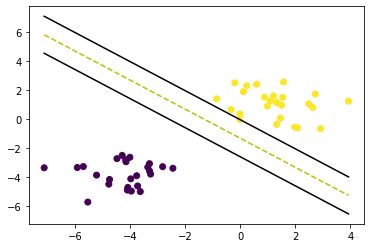

In [24]:
fig = plt.figure()
visualize(data_dict)
plt.show()

**Testing**

In [25]:
def predict(data,w,b):
  # print(data.shape)
  # print(w.shape)
  # print(b.shape)
  y_pred = np.matmul(w,data.T)+b
  y_pred=np.sign(y_pred)  
  return y_pred

test accuracy= 85.49974004848316


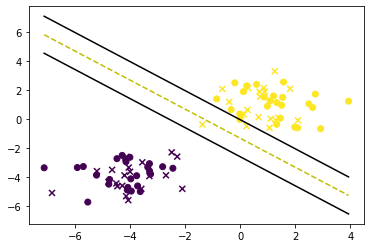

In [26]:
from sklearn.metrics import homogeneity_score

No_test_sample=40
# testing dataset
data1=np.random.multivariate_normal(mean1,var1,int(No_test_sample/2))
data2=np.random.multivariate_normal(mean2,var2,int(No_test_sample/2))
test_data=np.concatenate((data1,data2))
y_test=np.concatenate((-1*np.ones(data1.shape[0]),np.ones(data2.shape[0])))

# evaluate with the trained model

y_pred = predict(test_data,w,b)
print('test accuracy=',homogeneity_score(y_test,y_pred)*100)

#  Visualization
visualize(data_dict)
plt.scatter(test_data[:,0],test_data[:,1],marker='x',c=y_test)
plt.show()

**Use the Sci-kit Learn Package and perform Classification on the above dataset using the SVM algorithm**

In [27]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X,y)
print("Testing accuracy",model.score(test_data,y_test)*100)

Testing accuracy 100.0


#K-Nearest Neighbours (KNN)

Text(0.5, 1.0, 'Data visualization')

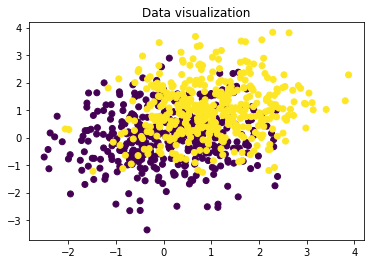

In [28]:
import numpy as np
import matplotlib.pyplot as plt

mean1=np.array([0,0])
mean2=np.array([1,1])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)

data1=np.random.multivariate_normal(mean1,var,500)
data2=np.random.multivariate_normal(mean2,var,500)

x_train=np.concatenate((data1[:-100,],data2[:-100]))
y_train=np.concatenate((np.zeros(data1.shape[0]-100),np.ones(data2.shape[0]-100)))

plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.title('Data visualization')

In [29]:
def euclidean_distance(row1, row2):
  return np.linalg.norm(row1-row2)

In [30]:


def get_neighbors(train,label_train, test_row, num_neighbors):
  distance = []
  for i in range(train.shape[0]):
    train_row = train[i, :]               # get ith training FV, and corresponding label
    y_trainel = label_train[i]
    d = euclidean_distance(test_row, train_row)
    distance.append([y_trainel, d])
  
  distance=np.array(distance)
  distance=distance[distance[:,1].argsort()]
  # print(distance)
  
  neighbors = []
  for i in range(num_neighbors):
    neighbors.append(distance[i][0])
  return neighbors


In [31]:

def predict_classification(neighbors):
  ## write your code here
  from collections import Counter
  predict=Counter(neighbors).most_common(1)[0][0]
  ## most common(n) returns n most common elements in the list in format(value,frequency) so [0][0] returns the value
  # print(predict)
  # print(neigbors)  
  return predict


In [32]:
# test data generation
x_test=np.concatenate((data1[-100:],data2[-100:]))
y_test=np.concatenate((np.zeros(100),np.ones(100)))

In [33]:
K=5

pred_label=np.zeros(x_test.shape[0])
for i in range(x_test.shape[0]):
  neighbour=get_neighbors(x_train,y_train, x_test[i,:], K)
  pred_label[i]=predict_classification(neighbour)

accuracy=(len(np.where(pred_label==y_test)[0])/len(y_test))*100
print('Testing Accuracy=',accuracy,'%')

Testing Accuracy= 73.0 %


**Use the Sci-kit Learn Package and perform Classification on the above dataset using the K-Nearest Neighbour algorithm**

In [35]:
## Write your code here
from sklearn.neighbors import KNeighborsClassifier
neighbour = KNeighborsClassifier(n_neighbors=K)
neighbour.fit(x_train, y_train)
print('Testing Accuracy=',neighbour.score(x_test,y_test)*100,'%')

Testing Accuracy= 73.0 %


#Classification on MNIST Digit Data

1. Read MNIST data and perform train-test split
2. Select any 2 Classes and perform classification task using SVM, KNN and Logistic Regression algorithms with the help of Sci-Kit Learn tool
3. Report the train and test accuracy and also display the results using confusion matrix
4. Repeat steps 2 and 3 for all 10 Classes and tabulate the results

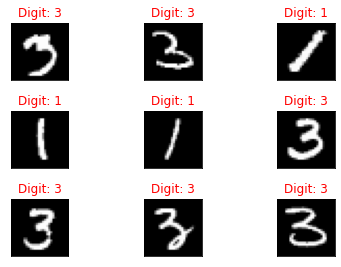

In [ ]:
## Write your code here
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import idx2numpy

# 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9
img_file = 't10k-images-idx3-ubyte'
lab_file = 't10k-labels-idx1-ubyte'
x = idx2numpy.convert_from_file(img_file)
y = idx2numpy.convert_from_file(lab_file)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

class_0 = 1
class_1 = 3

# get indices of images of reqd classes
i = np.where(y_train == class_0)[0]
j = np.where(y_train == class_1)[0]
# get data from those indices (for each class)
class_0_train = x_train[i, :, :]
class_0_label = y_train[i]
class_1_train = x_train[j, :, :]
class_1_label = y_train[j]

x_new = np.concatenate((class_0_train, class_1_train), axis=0)
y_new = np.concatenate((class_0_label,class_1_label), axis=0)

# print(x_train.shape)

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.tight_layout()
  pos=np.random.randint(0,x_new.shape[0])
  plt.imshow(x_new[pos], cmap='gray')
  plt.title("Digit: {}".format(y_new[pos]),color="red")
  plt.xticks([])
  plt.yticks([])
plt.show()

np.place(y_new, y_new==class_0, [0])
np.place(y_new, y_new==class_1, [1])

x_new = x_new.astype('float32')
x_new /= 255
x_new = x_new.reshape(y_new.shape[0], 28*28)

x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.3)

### SVM


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix as conf_mat

model = LinearSVC()

model.fit(x_train, y_train)
training_accuracy_svm = model.score(x_train, y_train)
testing_accuracy_svm = model.score(x_train, y_train)

print('Training accuracy =', training_accuracy_svm*100)
print('Testing accuracy = ', testing_accuracy_svm*100)
print("confusion matrix\n",conf_mat(y_test, model.predict(x_test)))

Training accuracy = 100.0
Testing accuracy =  100.0
confusion matrix
 [[237   3]
 [  1 207]]


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

testing_accuracy_knn = model.score(x_test,y_test)
training_accuracy_knn = model.score(x_train,y_train)

print('Testing Accuracy =', testing_accuracy_knn*100)
print('Training Accuracy =', training_accuracy_knn*100)
print("Confusion Matrix\n",conf_mat(y_test, model.predict(x_test)))

Testing Accuracy = 98.88392857142857
Training Accuracy = 99.52107279693486
Confusion Matrix
 [[238   2]
 [  3 205]]


### LR

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

training_accuracy_lr = model.score(x_train, y_train)
testing_accuracy_lr = model.score(x_test, y_test)

print('Training accuracy =', training_accuracy_lr*100)
print('Testing accuracy =', testing_accuracy_lr*100)
print("Confusion Matrix\n",conf_mat(y_test, model.predict(x_test)))

Training accuracy = 100.0
Testing accuracy = 99.33035714285714
Confusion Matrix
 [[237   3]
 [  0 208]]


## For multiclass

In [ ]:
## Write your code here
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import idx2numpy

# 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9
img_file = 't10k-images-idx3-ubyte'
lab_file = 't10k-labels-idx1-ubyte'
x = idx2numpy.convert_from_file(img_file)
y = idx2numpy.convert_from_file(lab_file)

x = x.astype('float32')
x /= 255
x = x.reshape(x.shape[0], 28*28)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

### SVM

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix as conf_mat

model = LinearSVC()
n = 2000
model.fit(x_train, y_train)
training_accuracy_svm = model.score(x_train, y_train)
print('Training accuracy =', training_accuracy_svm*100)

testing_accuracy_svm = model.score(x_test, y_test)
print('Testing accuracy = ', testing_accuracy_svm*100)

conf_mat(y_test, model.predict(x_test))

Training accuracy = 98.4857142857143
Testing accuracy =  88.16666666666667


c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([[290,   1,   1,   1,   1,   1,   1,   1,   3,   0],
       [  0, 340,   1,   0,   0,   2,   0,   1,   3,   0],
       [  6,   5, 282,   8,   4,   1,   6,  13,  13,   1],
       [  1,   1,  11, 257,   0,  13,   2,   3,  10,   2],
       [  0,   1,   3,   0, 257,   1,   1,   1,   1,  18],
       [  3,   5,   1,  16,   4, 212,   8,   6,   8,   4],
       [  2,   1,   6,   1,   2,  11, 261,   1,   1,   0],
       [  1,   6,   5,   3,   7,   1,   0, 249,   0,   8],
       [  3,   7,   8,   5,   3,  13,   5,   2, 237,  11],
       [  2,   1,   2,   6,  11,   5,   1,  11,   5, 260]], dtype=int64)

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

testing_accuracy_knn = model.score(x_test,y_test)
training_accuracy_knn = model.score(x_train,y_train)

print('Testing Accuracy =', testing_accuracy_knn*100)
print('Training Accuracy =', training_accuracy_knn*100)
print("Confusion Matrix\n",conf_mat(y_test, model.predict(x_test)))

Testing Accuracy = 94.26666666666667
Training Accuracy = 96.57142857142857
Confusion Matrix
 [[297   0   0   0   0   1   2   0   0   0]
 [  0 346   0   1   0   0   0   0   0   0]
 [  7   3 315   1   0   1   3   8   1   0]
 [  0   2   1 287   1   5   0   2   1   1]
 [  0   8   0   0 265   0   0   0   0  10]
 [  1   3   0   6   0 252   2   0   1   2]
 [  2   2   0   1   0   2 278   0   1   0]
 [  0  14   0   0   3   0   0 258   0   5]
 [  5   7   2   6   3  11   2   5 251   2]
 [  1   1   0   2   9   1   1  10   0 279]]


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

training_accuracy_lr = model.score(x_train, y_train)
testing_accuracy_lr = model.score(x_test,y_test)

print('Training accuracy =', training_accuracy_lr*100)
print('Testing accuracy =', testing_accuracy_lr*100)
print("Confusion Matrix\n",conf_mat(y_test, model.predict(x_test)))

Training accuracy = 98.42857142857143
Testing accuracy = 90.0
Confusion Matrix
 [[291   0   1   1   2   0   2   1   1   1]
 [  0 338   1   0   0   2   0   4   2   0]
 [  7   3 287   7   4   2   5  10  12   2]
 [  1   1   8 261   2   9   2   2   9   5]
 [  0   0   0   0 267   1   0   2   1  12]
 [  1   6   0  10   2 226   3   6  11   2]
 [  2   1   7   0   4  10 261   1   0   0]
 [  1   5   5   2   3   0   0 253   1  10]
 [  3   6   4   6   1   9   7   1 252   5]
 [  3   1   2   5  12   3   1   8   5 264]]
